# Model 1

In [9]:
from tensorflow.keras.applications.vgg19 import VGG19

In [75]:
model = VGG19(weights='imagenet')

In [74]:
#model.summary()

In [62]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input,decode_predictions
import numpy as np

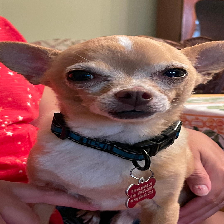

In [63]:
image_path = 'images/dog.jpg'
img = image.load_img(image_path,color_mode='rgb', target_size=(224, 224))
display(img)

In [64]:
#Convert to 3D Numpy Array
x = image.img_to_array(img)

In [65]:
x.shape

(224, 224, 3)

In [66]:
x = np.expand_dims(x, axis=0)

In [67]:
#mean centering with respect to Image
x = preprocess_input(x)
features = model.predict(x)
p = decode_predictions(features)

In [68]:
print(p)

[[('n02085620', 'Chihuahua', 0.9985631), ('n02113978', 'Mexican_hairless', 0.00053281256), ('n02091032', 'Italian_greyhound', 0.0004434176), ('n02107312', 'miniature_pinscher', 0.00019048904), ('n02087046', 'toy_terrier', 0.00017583082)]]


In [69]:
import pickle

with open('model.pkl', 'wb') as vgg19_model_pickle:
    pickle.dump(model, vgg19_model_pickle)

pickle.dump(model, open('model.pkl', 'wb'))

# Model 2

In [1]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg19 import preprocess_input
from keras.applications.vgg19 import decode_predictions
from keras.applications.vgg19 import VGG19
import tensorflow as tf

In [2]:
# load the model
model = VGG19(weights='imagenet')

In [3]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [4]:
# load an image from file
image = load_img('images/dog.jpg', target_size=(224, 224))

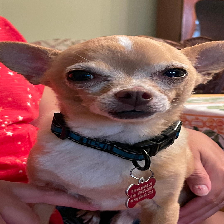

In [5]:
#Display Image
display(image)

In [6]:
#Convert to 3D Numpy Array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

In [7]:
image.shape

(1, 224, 224, 3)

In [10]:
# make prediction
predict = model.predict(image)
# decode prediction into label
label = decode_predictions(predict)
# retrieve the most likely probability
label = label[0][0]
# print the classification
prediction = label[1]
print('%s (%.2f%%)' % (label[1], label[2]*100))

Chihuahua (99.41%)


In [9]:
tf.keras.models.save_model(model, 'vgg19.h5')

# Another Way to Save Model

In [ ]:
from keras.models import model_from_json

In [ ]:
model_json = model.to_json()
with open("model/model.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
model.save_weights("model/model.h5")
print("Saved model to disk")